# Exercise sheet 2

In this second exercise sheet, we will apply some techniques we saw in the lectures about feature compression, clustering and generative models. We'll start by loading some of the libraries that we'll need.

Note that comments in the coding exercise cells below just serve as hints and are not requirements for your own code.

In [2]:
# plt to plot figures
import matplotlib.pyplot as plt
# numpy for array/matrix operations
import numpy as np
# loading the dataset loader function from sklearn
from sklearn.datasets import load_wine

# we set a seed variable for functions that use randomization (e.g. when shuffling data samples)
# this way, we can have reproducible results even with randomization
RANDOM_STATE = 2

### 0.1) Dataset

In this exercise sheet, we'll use the Wine dataset. From the description:

"The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine."

The code below should be familiar from the 1st exercise sheet.

In [3]:
# loading the sklearn data object (python dictionary-style object)
data = load_wine()


In [4]:
# Unrelated but maybe helpful: show class type of data (might clarify how to work with it)
print("Type of data: ", type(data))

# Check number and name of classes
print("Number of classes: ", len(np.unique(data['target'])))
print("Class names: ", data.target_names)

# features, target = data.data, data.target
X_all, y_all = data.data, data.target
# or with: features, target = load_breast_cancer(return_X_y=True)

print("Number of samples: ", X_all.shape[0])
print("Number of features: ", X_all.shape[1])

Type of data:  <class 'sklearn.utils._bunch.Bunch'>
Number of classes:  3
Class names:  ['class_0' 'class_1' 'class_2']
Number of samples:  178
Number of features:  13


In [5]:
# What kind of features?
print("Feature names:\n")
for idx, feature_name in enumerate(data.feature_names):
    print(idx, feature_name)

Feature names:

0 alcohol
1 malic_acid
2 ash
3 alcalinity_of_ash
4 magnesium
5 total_phenols
6 flavanoids
7 nonflavanoid_phenols
8 proanthocyanins
9 color_intensity
10 hue
11 od280/od315_of_diluted_wines
12 proline


## 1) Principal Component Analysis


### 1.1) Data Visualization
PCA can be used to help visualize your data by projecting high-dimensional feature spaces to lower-dimensional feature spaces. Let's try this here.

#### (T1.1) Your Task: Use PCA to transform your data and project it to a 2-dimensional space. Visualize the result as a scatter plot.

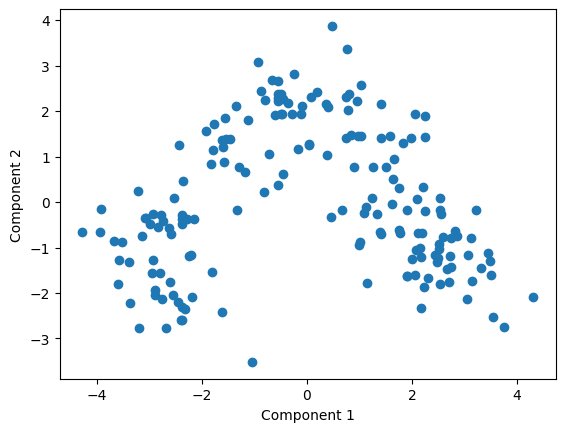

In [9]:
# set random seed for numpy (sklearn uses numpy's RNG)
np.random.seed(RANDOM_STATE)
# import PCA class
from sklearn.decomposition import PCA
# import class used to apply z-normalization on your dataset
from sklearn.preprocessing import StandardScaler

### YOUR CODE HERE 
# instantiate the scaler
scaler = StandardScaler()

# use the scaler's fit method to calculate mean and standard deviation of your train(!) set

X_scaled = scaler.fit_transform(data.data) # Train set? Tutorium fragen

# apply transform method to standardize your data subsets
### FIT_TRANSFORM() MACHT BEIDES

# run PCA and transform your data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# plot of two features (2D) after using PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1]) # Extracting the first and second principal components
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# Points with similar values along principal components are closer together, different values far apart

### YOUR CODE HERE END

### 1.2) Feature Compression

PCA is also used for feature compression. This can e.g. improve the training/run time of your model while still reaching similar performances compared to using uncompressed feature vectors.

#### (T1.2) Your task: Run PCA on your z-normalized train dataset. 
#### (T1.3) Your task: Determine the lowest number of principal components that result in explaining >80% of the variance in the train dataset. 

In [23]:
# set random seed for numpy (sklearn uses numpy's RNG)
np.random.seed(RANDOM_STATE)
# import PCA class
from sklearn.decomposition import PCA


### YOUR CODE HERE
# fit PCA
pca2 = PCA()
X_pca2 = pca2.fit_transform(X_scaled)

# determine the lowest number of components necessary to reach >80% variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

component_count = np.argmax(cumulative_variance_ratio > 0.8) + 1
explained_variance = cumulative_variance_ratio[component_count-1]
### YOUR CODE HERE END


# print the number of principal components and explained variance
print("Number of principal components that explain {:.2f} of the variance: {}" \
      .format(explained_variance, component_count))

Number of principal components that explain 0.80 of the variance: 5


### 1.3) Experiments

Let's now train a kNN classifier with and without PCA-based feature compression and compare the results.

#### (T1.3) Your task:  Train and evaluate kNN (k=5) with 10-fold cross-validation, using the original given features. Then do the same with PCA-compressed features (using the number of PCA-components determined in T1.3 - note: alternatively use some random small number). Compare mean accuracy results. Hint: Feel free to copy&modify code from the first exercise sheet.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
np.random.seed(RANDOM_STATE)


### YOUR CODE HERE










### YOUR CODE HERE END

## 2) Clustering: K-Means

The k-means algorithm is an iterative algorithm that tries to partition the dataset into k pre-defined distinct non-overlapping clusters where each data point belongs to only one cluster. One of the applications of k-means is vector quantization. 

In this exercise, we'll use k-means to perform color quantization to an image. k-means will find a small number (=k) of representative colors within the given picture. Each pixel in the image yields a 3-dimensional pattern in the RGB color space. Using k-means we can cluster all the pixels of an image into k clusters and then assign each pixel the color represented by its nearest cluster center. Thereby, an image containing millions of colors can be compressed to an image containing k different colors only.

#### (T2.1) Your task: Fit k-means with k=64 on the given image. Predict the nearest cluster center for all pixels in the image. Recreate the image and visualize it.
#### (T2.2) Your task: Do the same with an image of your choice.

In [ ]:
from sklearn.cluster import KMeans
# for loading the image from sklearn
from sklearn.datasets import load_sample_image
# for shuffling input to k-means fit method (optional: faster if subset of all pixels are sampled instead of using full image)
from sklearn.utils import shuffle

np.random.seed(RANDOM_STATE)

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Normalize color values to be in the range of [0-1] instead of [0-255]
china = np.array(china, dtype=np.float64) / 255

### YOUR CODE HERE 
# transform to a 2D numpy array of shape (n,3) with "3" containing RGB color intensities


# Fitting the kmeans model (k=64), optionally do this only on a small sub-sample of the data if it takes too long with full image


# Get labels for all points
# Predicting color indices on the full image (k-means)


# recreate the (compressed) image using labels and kmeans cluster centers


# visualize the original image and the newly created image with 64 colors


### YOUR CODE HERE END
plt.show()

## 3) Gaussian Mixture Model

For this exercise, we'll use GMMs to separate background from foreground (here:flower) in a given image. Take a look at the image below.

You'll need to estimate two mixtures of Gaussians to model the densities of the foreground and background pixels based on their color intensity. Then, apply the estimated models to the input image and segment the foreground and background regions.

#### (T3.1) Your task: Write a method that selects all pixel values inside a specified bounding box (given by the coordinates of the top-left and bottom-right corners) that is containing the foreground region. Train a GMM for the foreground class using all pixels inside this bounding box. 

#### (T3.2) Your task: Train a GMM for the background class using all pixels OUTSIDE the bounding box used in T3.1.

#### (T3.3) Your task: Compute the binary segmentation of the input image by making use of the two fitted GMMs. Then visualize this as a black&white image.


Hint: Results are best if the bounding box mostly contains flower (=the foreground region). Comments below can serve as pointers for your own code (not a requirement). 

In [ ]:
# load the image from sklearn database
image = load_sample_image("flower.jpg")

# take a look at the image
plt.imshow(image)
plt.show()

In [ ]:
import copy

# load the image from sklearn database
image = load_sample_image("flower.jpg")

### YOUR CODE HERE 
# function that returns mask for the bounding box
# inverse: return mask for NOT(bounding box)


# define a bounding box for the flower (x1,x2,y1,y2) with 0 origin of coordinates in upper left corner

# get foreground (center flower) mask

# take a look
plt.imshow(fg)
plt.show()

# get background (not center flower) mask


### YOUR CODE HERE END
# take a look
plt.imshow(bg)
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture
np.random.seed(RANDOM_STATE)

### YOUR CODE HERE
# Normalize color values to be in the range of [0-1] instead of [0-255]

# transform all image variants to a 2D numpy array


# select only elements that match the mask (=where the values are not zero)


# make sure the number of selected elements matches the total number of elements in the image 


# train the foreground GMM (flower)


# train the background GMM (rest)


### YOUR CODE HERE END

In [ ]:
### YOUR CODE HERE
# get likelihood scores from both models for each pixel in the image


# determine which pixel belongs to which class (foreground/background)


# visualize the result as a black/white image (0=fg=white), (1=bg=black)


### YOUR CODE HERE END
plt.show()

# 4) Q&A (Bonus Points)      Due: Mo, 26.05.22, 23:59

#### (T4) Your task: Answer the questions below and give explanations where required. 

4.1) What is the curse of dimensionality? 

4.2) What does PCA mean and what does it do (1 sentence)?

4.3) What are the steps to calculate PCA? (roughly)?

4.4) How is feature compression achieved with PCA?

4.5) What is clustering in ML and what is it used for?

4.6) What does the K in K-Means mean?

4.7) What is the difference between discriminative and generative models? Give an example for each.

4.9) Shortly explain the E- and the M- step in the EM-algorithm.

